In [1]:
import tensorflow as tf
import numpy as np
import os
import model
import matplotlib.pyplot as plt
from load_data import LoadTrainBatch,LoadValBatch

In [2]:
ckpt = tf.train.get_checkpoint_state('./save/')
saver = tf.train.import_meta_graph(ckpt.model_checkpoint_path +'.meta')

In [3]:
def getmean(layer):
    return  tf.expand_dims(tf.reduce_mean(layer,axis=3),3)

def deconv_layer(layer1, layer2, conv=1,strides=(1,1,1,1)):
    filter = tf.ones(shape=[conv, conv, 1, 1])
    return tf.nn.conv2d_transpose(layer1,filter, layer2.shape, strides=strides, padding="VALID",data_format='NHWC')

INFO:tensorflow:Restoring parameters from ./save/model.ckpt


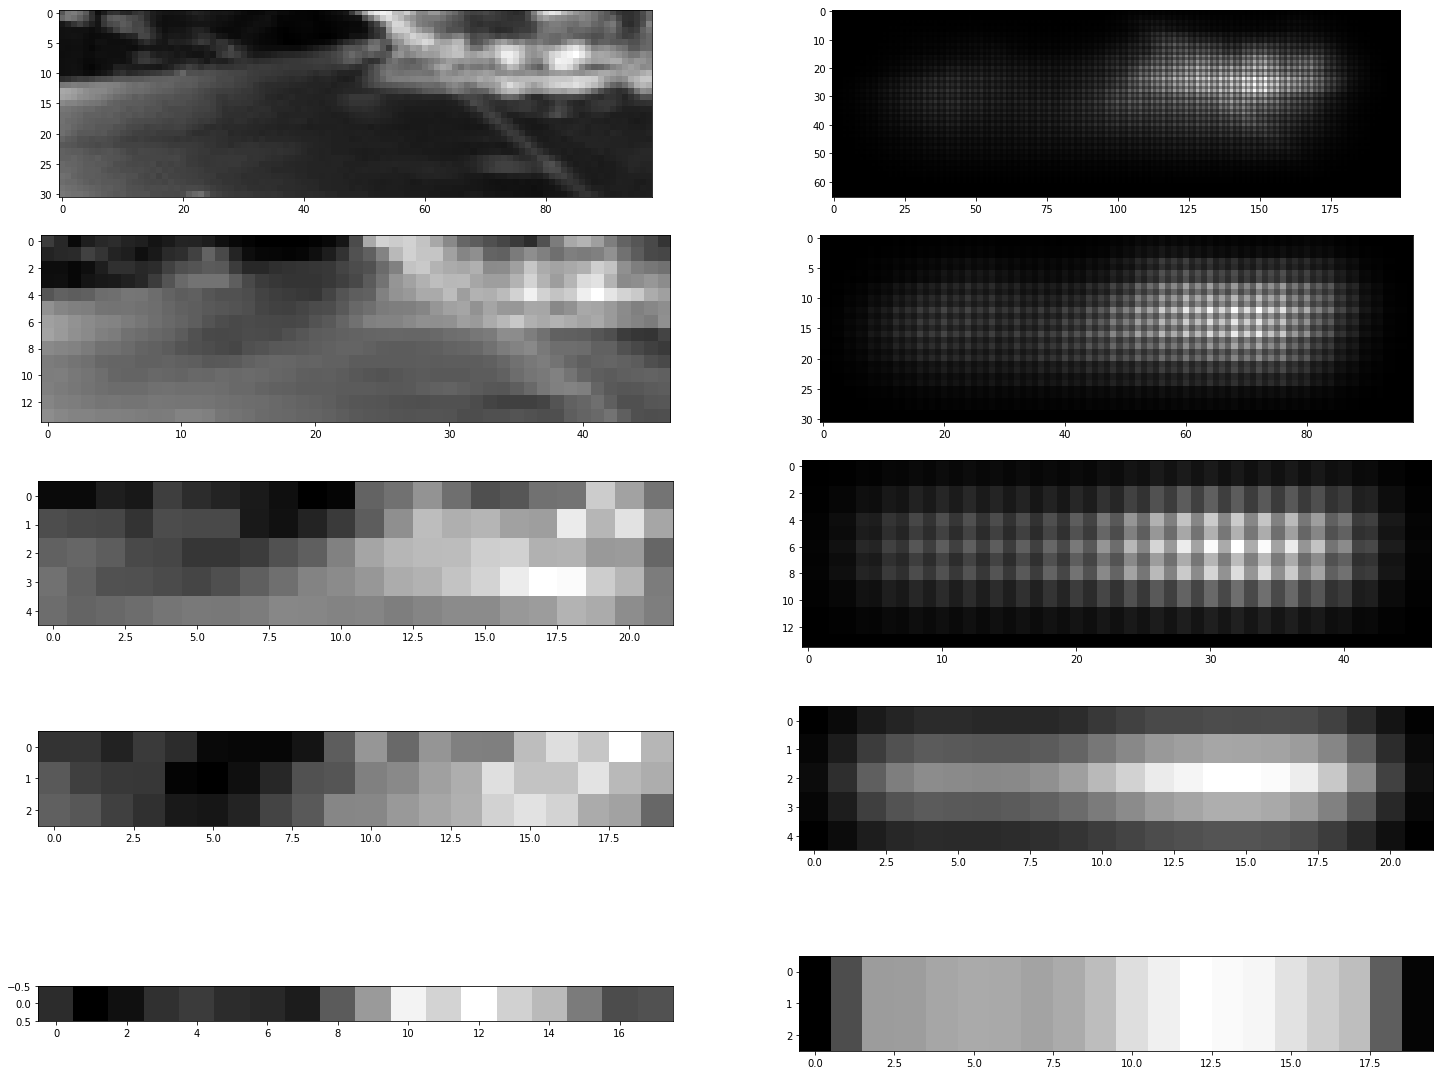

In [20]:
#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, ckpt.model_checkpoint_path)
    graph = tf.get_default_graph()
    conv1_layer = graph.get_operation_by_name('conv1_layer/conv_layer').outputs[0]
    conv2_layer = graph.get_operation_by_name('conv2_layer/conv_layer').outputs[0]
    conv3_layer = graph.get_operation_by_name('conv3_layer/conv_layer').outputs[0]
    conv4_layer = graph.get_operation_by_name('conv4_layer/conv_layer').outputs[0]
    conv5_layer = graph.get_operation_by_name('conv5_layer/conv_layer').outputs[0]
    loss = graph.get_operation_by_name('loss').outputs[0]
    xs = graph.get_operation_by_name('xs').outputs[0]
    ys = graph.get_operation_by_name('ys').outputs[0]
    conv5_mean = getmean(conv5_layer).eval(feed_dict={xs:x})
    conv4_mean = getmean(conv4_layer).eval(feed_dict={xs:x})
    conv3_mean = getmean(conv3_layer).eval(feed_dict={xs:x})
    conv2_mean = getmean(conv2_layer).eval(feed_dict={xs:x})
    conv1_mean = getmean(conv1_layer).eval(feed_dict={xs:x})
    normalized_mean = getmean(xs.eval(feed_dict={xs:x}))
    
    mask5 = deconv_layer(conv5_mean, conv4_mean, 3, strides=[1, 1, 1, 1])
    mask4 = deconv_layer(mask5 * conv4_mean, conv3_mean, 3, strides=[1, 1, 1, 1])
    mask3 = deconv_layer(mask4 * conv3_mean, conv2_mean, 5, strides=[1, 2, 2, 1])
    mask2 = deconv_layer(mask3 * conv2_mean, conv1_mean, 5, strides=[1, 2, 2, 1])
    mask1 = deconv_layer(mask2 * conv1_mean, normalized_mean, 5, strides=[1, 2, 2, 1])
     #####tensor定义完毕
    [x, y] = LoadTrainBatch(1)
    mask5_val = mask5.eval(feed_dict={xs: x})
    mask4_val = mask4.eval(feed_dict={xs: x})
    mask3_val = mask3.eval(feed_dict={xs: x})
    mask2_val = mask2.eval(feed_dict={xs: x})
    mask1_val = mask1.eval(feed_dict={xs: x})
    #show mask_layer
    fig = plt.figure(figsize=(25,20))
    
    ax1 = fig.add_subplot(5, 2, 1)
    ax1.imshow(conv1_mean.reshape(conv1_mean.shape[1],conv1_mean.shape[2]), cmap=plt.cm.gray)
    ax1 = fig.add_subplot(5, 2, 2)
    ax1.imshow(mask1_val.reshape(mask1_val.shape[1], mask1_val.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 3)
    ax2.imshow(conv2_mean.reshape(conv2_mean.shape[1], conv2_mean.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 4)
    ax2.imshow(mask2_val.reshape(mask2_val.shape[1], mask2_val.shape[2]), cmap=plt.cm.gray)  
    ax3 = fig.add_subplot(5, 2, 5)
    ax3.imshow(conv3_mean.reshape(conv3_mean.shape[1], conv3_mean.shape[2]), cmap=plt.cm.gray)
    ax3 = fig.add_subplot(5, 2, 6)
    ax3.imshow(mask3_val.reshape(mask3_val.shape[1], mask3_val.shape[2]), cmap=plt.cm.gray)  
    ax4 = fig.add_subplot(5, 2, 7)
    ax4.imshow(conv4_mean.reshape(conv4_mean.shape[1], conv4_mean.shape[2]), cmap=plt.cm.gray)
    ax4 = fig.add_subplot(5, 2, 8)
    ax4.imshow(mask4_val.reshape(mask4_val.shape[1], mask4_val.shape[2]), cmap=plt.cm.gray)   
    ax5 = fig.add_subplot(5, 2, 9)
    ax5.imshow(conv5_mean.reshape(conv5_mean.shape[1], conv5_mean.shape[2]), cmap=plt.cm.gray)
    ax5 = fig.add_subplot(5, 2, 10)
    ax5.imshow(mask5_val.reshape(mask5_val.shape[1], mask5_val.shape[2]), cmap=plt.cm.gray)  
    plt.show()

INFO:tensorflow:Restoring parameters from ./save/model.ckpt


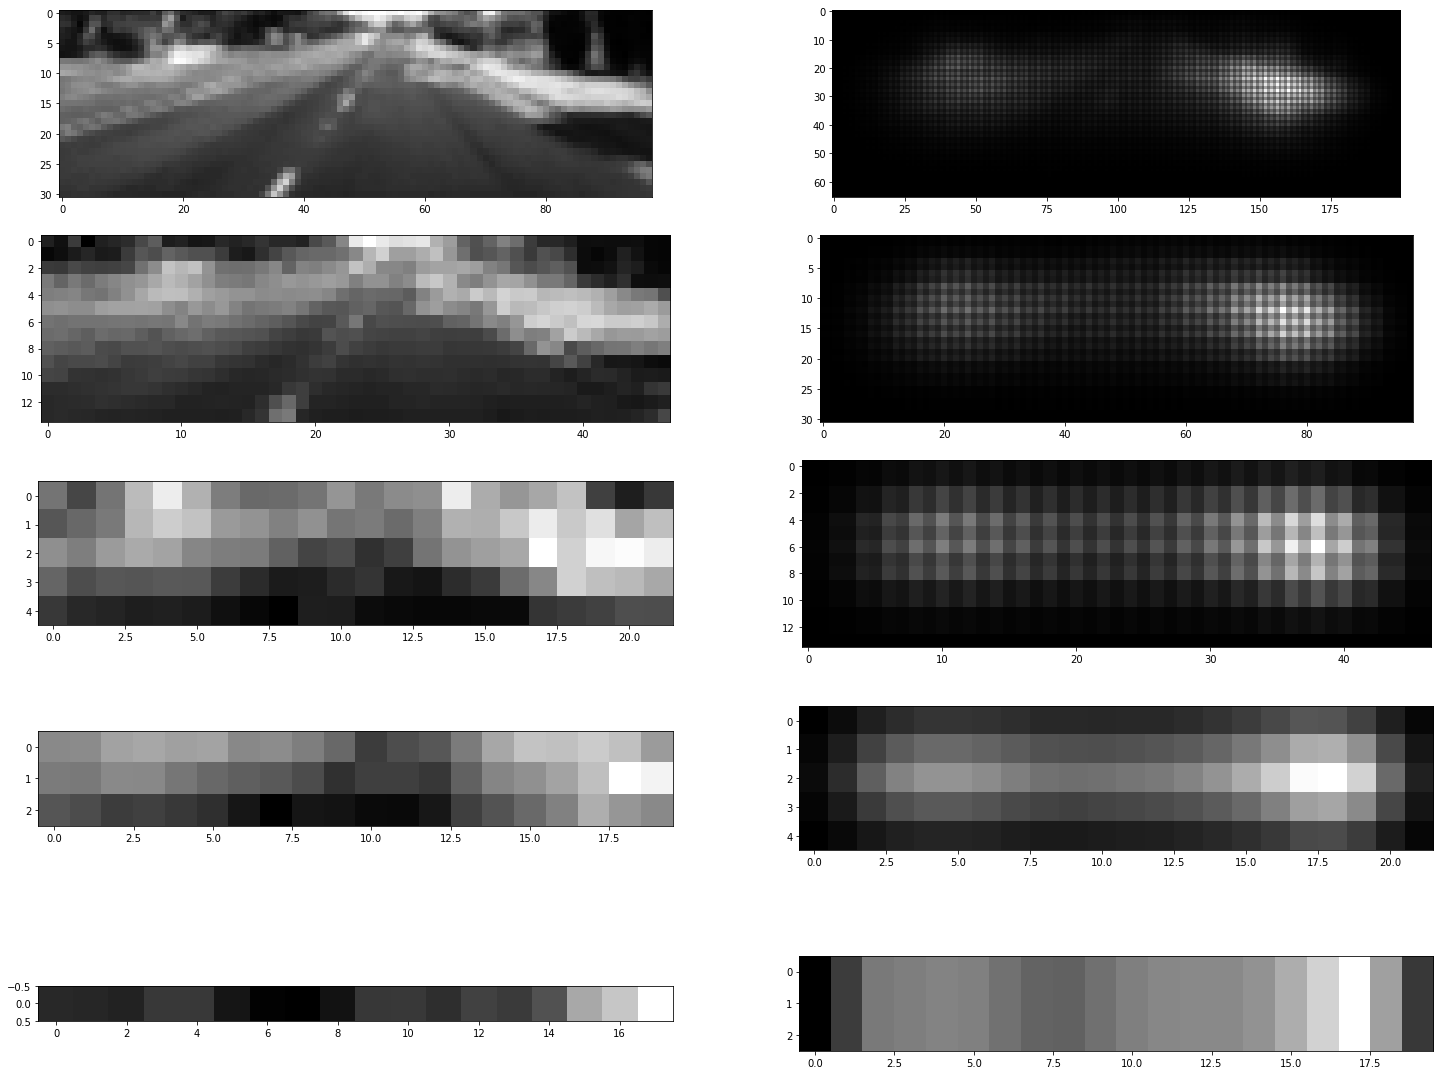

In [21]:
#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, ckpt.model_checkpoint_path)
    graph = tf.get_default_graph()
    conv1_layer = graph.get_operation_by_name('conv1_layer/conv_layer').outputs[0]
    conv2_layer = graph.get_operation_by_name('conv2_layer/conv_layer').outputs[0]
    conv3_layer = graph.get_operation_by_name('conv3_layer/conv_layer').outputs[0]
    conv4_layer = graph.get_operation_by_name('conv4_layer/conv_layer').outputs[0]
    conv5_layer = graph.get_operation_by_name('conv5_layer/conv_layer').outputs[0]
    loss = graph.get_operation_by_name('loss').outputs[0]
    xs = graph.get_operation_by_name('xs').outputs[0]
    ys = graph.get_operation_by_name('ys').outputs[0]
    conv5_mean = getmean(conv5_layer).eval(feed_dict={xs:x})
    conv4_mean = getmean(conv4_layer).eval(feed_dict={xs:x})
    conv3_mean = getmean(conv3_layer).eval(feed_dict={xs:x})
    conv2_mean = getmean(conv2_layer).eval(feed_dict={xs:x})
    conv1_mean = getmean(conv1_layer).eval(feed_dict={xs:x})
    normalized_mean = getmean(xs.eval(feed_dict={xs:x}))
    
    mask5 = deconv_layer(conv5_mean, conv4_mean, 3, strides=[1, 1, 1, 1])
    mask4 = deconv_layer(mask5 * conv4_mean, conv3_mean, 3, strides=[1, 1, 1, 1])
    mask3 = deconv_layer(mask4 * conv3_mean, conv2_mean, 5, strides=[1, 2, 2, 1])
    mask2 = deconv_layer(mask3 * conv2_mean, conv1_mean, 5, strides=[1, 2, 2, 1])
    mask1 = deconv_layer(mask2 * conv1_mean, normalized_mean, 5, strides=[1, 2, 2, 1])
     #####tensor定义完毕
    [x, y] = LoadTrainBatch(1)
    mask5_val = mask5.eval(feed_dict={xs: x})
    mask4_val = mask4.eval(feed_dict={xs: x})
    mask3_val = mask3.eval(feed_dict={xs: x})
    mask2_val = mask2.eval(feed_dict={xs: x})
    mask1_val = mask1.eval(feed_dict={xs: x})
    #show mask_layer
    fig = plt.figure(figsize=(25,20))
    
    ax1 = fig.add_subplot(5, 2, 1)
    ax1.imshow(conv1_mean.reshape(conv1_mean.shape[1],conv1_mean.shape[2]), cmap=plt.cm.gray)
    ax1 = fig.add_subplot(5, 2, 2)
    ax1.imshow(mask1_val.reshape(mask1_val.shape[1], mask1_val.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 3)
    ax2.imshow(conv2_mean.reshape(conv2_mean.shape[1], conv2_mean.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 4)
    ax2.imshow(mask2_val.reshape(mask2_val.shape[1], mask2_val.shape[2]), cmap=plt.cm.gray)  
    ax3 = fig.add_subplot(5, 2, 5)
    ax3.imshow(conv3_mean.reshape(conv3_mean.shape[1], conv3_mean.shape[2]), cmap=plt.cm.gray)
    ax3 = fig.add_subplot(5, 2, 6)
    ax3.imshow(mask3_val.reshape(mask3_val.shape[1], mask3_val.shape[2]), cmap=plt.cm.gray)  
    ax4 = fig.add_subplot(5, 2, 7)
    ax4.imshow(conv4_mean.reshape(conv4_mean.shape[1], conv4_mean.shape[2]), cmap=plt.cm.gray)
    ax4 = fig.add_subplot(5, 2, 8)
    ax4.imshow(mask4_val.reshape(mask4_val.shape[1], mask4_val.shape[2]), cmap=plt.cm.gray)   
    ax5 = fig.add_subplot(5, 2, 9)
    ax5.imshow(conv5_mean.reshape(conv5_mean.shape[1], conv5_mean.shape[2]), cmap=plt.cm.gray)
    ax5 = fig.add_subplot(5, 2, 10)
    ax5.imshow(mask5_val.reshape(mask5_val.shape[1], mask5_val.shape[2]), cmap=plt.cm.gray)  
    plt.show()

INFO:tensorflow:Restoring parameters from ./save/model.ckpt


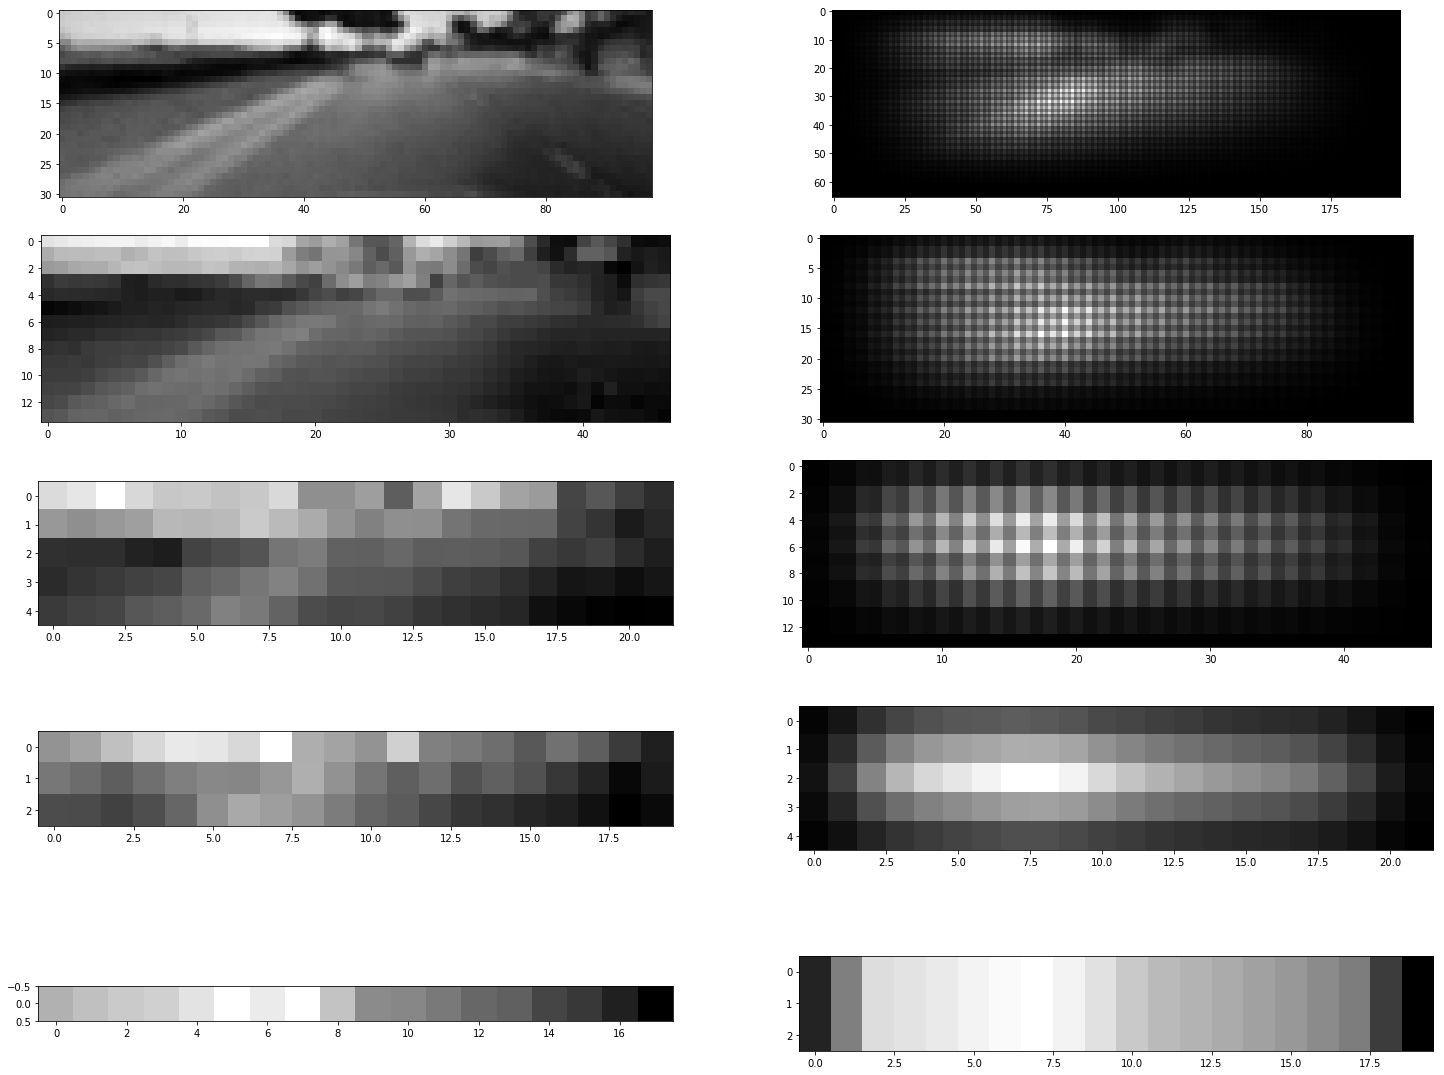

In [22]:
#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, ckpt.model_checkpoint_path)
    graph = tf.get_default_graph()
    conv1_layer = graph.get_operation_by_name('conv1_layer/conv_layer').outputs[0]
    conv2_layer = graph.get_operation_by_name('conv2_layer/conv_layer').outputs[0]
    conv3_layer = graph.get_operation_by_name('conv3_layer/conv_layer').outputs[0]
    conv4_layer = graph.get_operation_by_name('conv4_layer/conv_layer').outputs[0]
    conv5_layer = graph.get_operation_by_name('conv5_layer/conv_layer').outputs[0]
    loss = graph.get_operation_by_name('loss').outputs[0]
    xs = graph.get_operation_by_name('xs').outputs[0]
    ys = graph.get_operation_by_name('ys').outputs[0]
    conv5_mean = getmean(conv5_layer).eval(feed_dict={xs:x})
    conv4_mean = getmean(conv4_layer).eval(feed_dict={xs:x})
    conv3_mean = getmean(conv3_layer).eval(feed_dict={xs:x})
    conv2_mean = getmean(conv2_layer).eval(feed_dict={xs:x})
    conv1_mean = getmean(conv1_layer).eval(feed_dict={xs:x})
    normalized_mean = getmean(xs.eval(feed_dict={xs:x}))
    
    mask5 = deconv_layer(conv5_mean, conv4_mean, 3, strides=[1, 1, 1, 1])
    mask4 = deconv_layer(mask5 * conv4_mean, conv3_mean, 3, strides=[1, 1, 1, 1])
    mask3 = deconv_layer(mask4 * conv3_mean, conv2_mean, 5, strides=[1, 2, 2, 1])
    mask2 = deconv_layer(mask3 * conv2_mean, conv1_mean, 5, strides=[1, 2, 2, 1])
    mask1 = deconv_layer(mask2 * conv1_mean, normalized_mean, 5, strides=[1, 2, 2, 1])
     #####tensor定义完毕
    [x, y] = LoadTrainBatch(1)
    mask5_val = mask5.eval(feed_dict={xs: x})
    mask4_val = mask4.eval(feed_dict={xs: x})
    mask3_val = mask3.eval(feed_dict={xs: x})
    mask2_val = mask2.eval(feed_dict={xs: x})
    mask1_val = mask1.eval(feed_dict={xs: x})
    #show mask_layer
    fig = plt.figure(figsize=(25,20))
    
    ax1 = fig.add_subplot(5, 2, 1)
    ax1.imshow(conv1_mean.reshape(conv1_mean.shape[1],conv1_mean.shape[2]), cmap=plt.cm.gray)
    ax1 = fig.add_subplot(5, 2, 2)
    ax1.imshow(mask1_val.reshape(mask1_val.shape[1], mask1_val.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 3)
    ax2.imshow(conv2_mean.reshape(conv2_mean.shape[1], conv2_mean.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 4)
    ax2.imshow(mask2_val.reshape(mask2_val.shape[1], mask2_val.shape[2]), cmap=plt.cm.gray)  
    ax3 = fig.add_subplot(5, 2, 5)
    ax3.imshow(conv3_mean.reshape(conv3_mean.shape[1], conv3_mean.shape[2]), cmap=plt.cm.gray)
    ax3 = fig.add_subplot(5, 2, 6)
    ax3.imshow(mask3_val.reshape(mask3_val.shape[1], mask3_val.shape[2]), cmap=plt.cm.gray)  
    ax4 = fig.add_subplot(5, 2, 7)
    ax4.imshow(conv4_mean.reshape(conv4_mean.shape[1], conv4_mean.shape[2]), cmap=plt.cm.gray)
    ax4 = fig.add_subplot(5, 2, 8)
    ax4.imshow(mask4_val.reshape(mask4_val.shape[1], mask4_val.shape[2]), cmap=plt.cm.gray)   
    ax5 = fig.add_subplot(5, 2, 9)
    ax5.imshow(conv5_mean.reshape(conv5_mean.shape[1], conv5_mean.shape[2]), cmap=plt.cm.gray)
    ax5 = fig.add_subplot(5, 2, 10)
    ax5.imshow(mask5_val.reshape(mask5_val.shape[1], mask5_val.shape[2]), cmap=plt.cm.gray)  
    plt.show()

INFO:tensorflow:Restoring parameters from ./save/model.ckpt


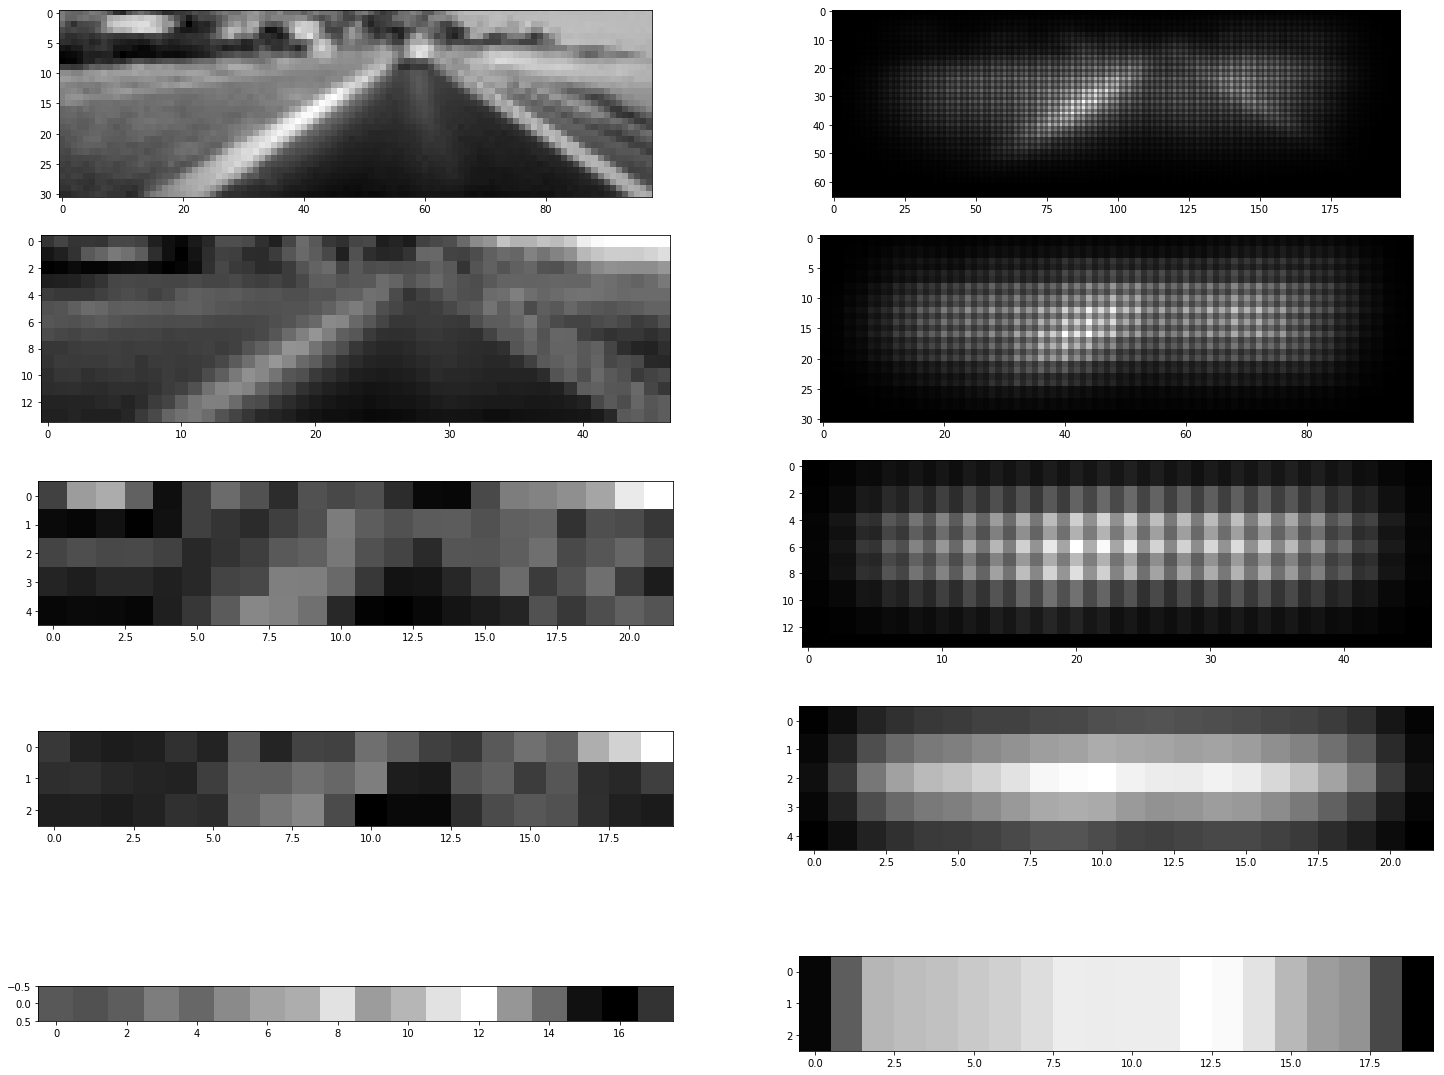

In [24]:
#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, ckpt.model_checkpoint_path)
    graph = tf.get_default_graph()
    conv1_layer = graph.get_operation_by_name('conv1_layer/conv_layer').outputs[0]
    conv2_layer = graph.get_operation_by_name('conv2_layer/conv_layer').outputs[0]
    conv3_layer = graph.get_operation_by_name('conv3_layer/conv_layer').outputs[0]
    conv4_layer = graph.get_operation_by_name('conv4_layer/conv_layer').outputs[0]
    conv5_layer = graph.get_operation_by_name('conv5_layer/conv_layer').outputs[0]
    loss = graph.get_operation_by_name('loss').outputs[0]
    xs = graph.get_operation_by_name('xs').outputs[0]
    ys = graph.get_operation_by_name('ys').outputs[0]
    conv5_mean = getmean(conv5_layer).eval(feed_dict={xs:x})
    conv4_mean = getmean(conv4_layer).eval(feed_dict={xs:x})
    conv3_mean = getmean(conv3_layer).eval(feed_dict={xs:x})
    conv2_mean = getmean(conv2_layer).eval(feed_dict={xs:x})
    conv1_mean = getmean(conv1_layer).eval(feed_dict={xs:x})
    normalized_mean = getmean(xs.eval(feed_dict={xs:x}))
    
    mask5 = deconv_layer(conv5_mean, conv4_mean, 3, strides=[1, 1, 1, 1])
    mask4 = deconv_layer(mask5 * conv4_mean, conv3_mean, 3, strides=[1, 1, 1, 1])
    mask3 = deconv_layer(mask4 * conv3_mean, conv2_mean, 5, strides=[1, 2, 2, 1])
    mask2 = deconv_layer(mask3 * conv2_mean, conv1_mean, 5, strides=[1, 2, 2, 1])
    mask1 = deconv_layer(mask2 * conv1_mean, normalized_mean, 5, strides=[1, 2, 2, 1])
     #####tensor定义完毕
    [x, y] = LoadTrainBatch(1)
    mask5_val = mask5.eval(feed_dict={xs: x})
    mask4_val = mask4.eval(feed_dict={xs: x})
    mask3_val = mask3.eval(feed_dict={xs: x})
    mask2_val = mask2.eval(feed_dict={xs: x})
    mask1_val = mask1.eval(feed_dict={xs: x})
    #show mask_layer
    fig = plt.figure(figsize=(25,20))
    
    ax1 = fig.add_subplot(5, 2, 1)
    ax1.imshow(conv1_mean.reshape(conv1_mean.shape[1],conv1_mean.shape[2]), cmap=plt.cm.gray)
    ax1 = fig.add_subplot(5, 2, 2)
    ax1.imshow(mask1_val.reshape(mask1_val.shape[1], mask1_val.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 3)
    ax2.imshow(conv2_mean.reshape(conv2_mean.shape[1], conv2_mean.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 4)
    ax2.imshow(mask2_val.reshape(mask2_val.shape[1], mask2_val.shape[2]), cmap=plt.cm.gray)  
    ax3 = fig.add_subplot(5, 2, 5)
    ax3.imshow(conv3_mean.reshape(conv3_mean.shape[1], conv3_mean.shape[2]), cmap=plt.cm.gray)
    ax3 = fig.add_subplot(5, 2, 6)
    ax3.imshow(mask3_val.reshape(mask3_val.shape[1], mask3_val.shape[2]), cmap=plt.cm.gray)  
    ax4 = fig.add_subplot(5, 2, 7)
    ax4.imshow(conv4_mean.reshape(conv4_mean.shape[1], conv4_mean.shape[2]), cmap=plt.cm.gray)
    ax4 = fig.add_subplot(5, 2, 8)
    ax4.imshow(mask4_val.reshape(mask4_val.shape[1], mask4_val.shape[2]), cmap=plt.cm.gray)   
    ax5 = fig.add_subplot(5, 2, 9)
    ax5.imshow(conv5_mean.reshape(conv5_mean.shape[1], conv5_mean.shape[2]), cmap=plt.cm.gray)
    ax5 = fig.add_subplot(5, 2, 10)
    ax5.imshow(mask5_val.reshape(mask5_val.shape[1], mask5_val.shape[2]), cmap=plt.cm.gray)  
    plt.show()

INFO:tensorflow:Restoring parameters from ./save/model.ckpt


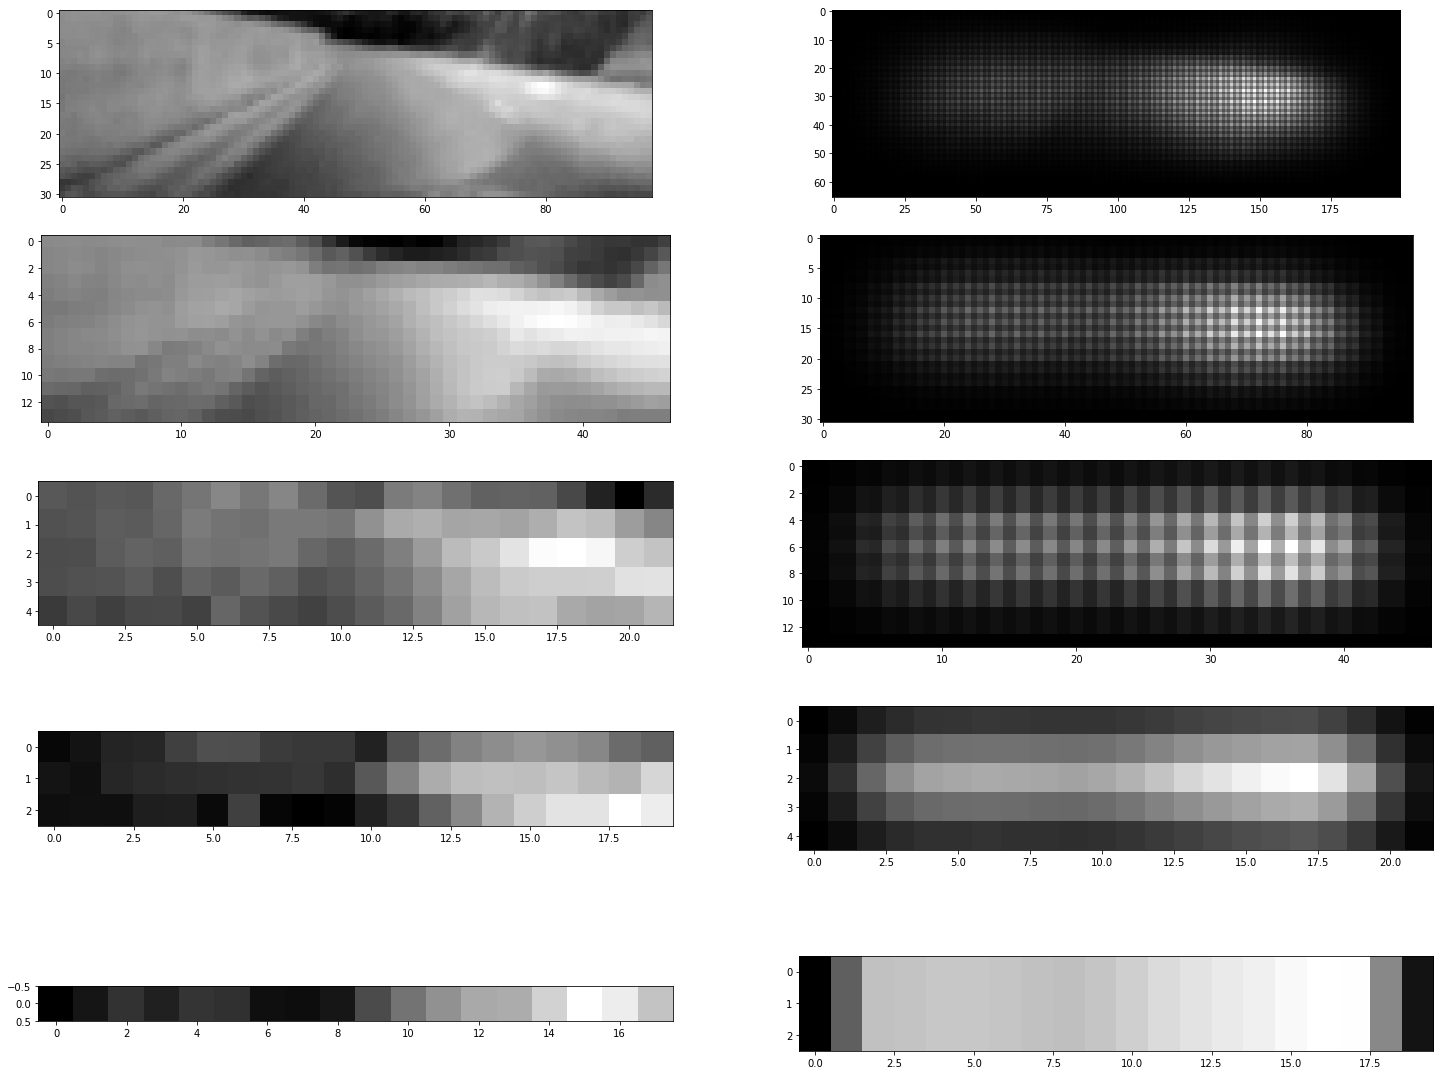

In [25]:
#with tf.Session(config=config) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, ckpt.model_checkpoint_path)
    graph = tf.get_default_graph()
    conv1_layer = graph.get_operation_by_name('conv1_layer/conv_layer').outputs[0]
    conv2_layer = graph.get_operation_by_name('conv2_layer/conv_layer').outputs[0]
    conv3_layer = graph.get_operation_by_name('conv3_layer/conv_layer').outputs[0]
    conv4_layer = graph.get_operation_by_name('conv4_layer/conv_layer').outputs[0]
    conv5_layer = graph.get_operation_by_name('conv5_layer/conv_layer').outputs[0]
    loss = graph.get_operation_by_name('loss').outputs[0]
    xs = graph.get_operation_by_name('xs').outputs[0]
    ys = graph.get_operation_by_name('ys').outputs[0]
    conv5_mean = getmean(conv5_layer).eval(feed_dict={xs:x})
    conv4_mean = getmean(conv4_layer).eval(feed_dict={xs:x})
    conv3_mean = getmean(conv3_layer).eval(feed_dict={xs:x})
    conv2_mean = getmean(conv2_layer).eval(feed_dict={xs:x})
    conv1_mean = getmean(conv1_layer).eval(feed_dict={xs:x})
    normalized_mean = getmean(xs.eval(feed_dict={xs:x}))
    
    mask5 = deconv_layer(conv5_mean, conv4_mean, 3, strides=[1, 1, 1, 1])
    mask4 = deconv_layer(mask5 * conv4_mean, conv3_mean, 3, strides=[1, 1, 1, 1])
    mask3 = deconv_layer(mask4 * conv3_mean, conv2_mean, 5, strides=[1, 2, 2, 1])
    mask2 = deconv_layer(mask3 * conv2_mean, conv1_mean, 5, strides=[1, 2, 2, 1])
    mask1 = deconv_layer(mask2 * conv1_mean, normalized_mean, 5, strides=[1, 2, 2, 1])
     #####tensor定义完毕
    [x, y] = LoadTrainBatch(1)
    mask5_val = mask5.eval(feed_dict={xs: x})
    mask4_val = mask4.eval(feed_dict={xs: x})
    mask3_val = mask3.eval(feed_dict={xs: x})
    mask2_val = mask2.eval(feed_dict={xs: x})
    mask1_val = mask1.eval(feed_dict={xs: x})
    #show mask_layer
    fig = plt.figure(figsize=(25,20))
    
    ax1 = fig.add_subplot(5, 2, 1)
    ax1.imshow(conv1_mean.reshape(conv1_mean.shape[1],conv1_mean.shape[2]), cmap=plt.cm.gray)
    ax1 = fig.add_subplot(5, 2, 2)
    ax1.imshow(mask1_val.reshape(mask1_val.shape[1], mask1_val.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 3)
    ax2.imshow(conv2_mean.reshape(conv2_mean.shape[1], conv2_mean.shape[2]), cmap=plt.cm.gray)  
    ax2 = fig.add_subplot(5, 2, 4)
    ax2.imshow(mask2_val.reshape(mask2_val.shape[1], mask2_val.shape[2]), cmap=plt.cm.gray)  
    ax3 = fig.add_subplot(5, 2, 5)
    ax3.imshow(conv3_mean.reshape(conv3_mean.shape[1], conv3_mean.shape[2]), cmap=plt.cm.gray)
    ax3 = fig.add_subplot(5, 2, 6)
    ax3.imshow(mask3_val.reshape(mask3_val.shape[1], mask3_val.shape[2]), cmap=plt.cm.gray)  
    ax4 = fig.add_subplot(5, 2, 7)
    ax4.imshow(conv4_mean.reshape(conv4_mean.shape[1], conv4_mean.shape[2]), cmap=plt.cm.gray)
    ax4 = fig.add_subplot(5, 2, 8)
    ax4.imshow(mask4_val.reshape(mask4_val.shape[1], mask4_val.shape[2]), cmap=plt.cm.gray)   
    ax5 = fig.add_subplot(5, 2, 9)
    ax5.imshow(conv5_mean.reshape(conv5_mean.shape[1], conv5_mean.shape[2]), cmap=plt.cm.gray)
    ax5 = fig.add_subplot(5, 2, 10)
    ax5.imshow(mask5_val.reshape(mask5_val.shape[1], mask5_val.shape[2]), cmap=plt.cm.gray)  
    plt.show()